## Pytorch Hands-on



### Goals



-   If you're already a deep learning master, not the talk for you!
-   Get up and running quickly with Deep Learning
    -   In particular, the goal is to build neural networks you can take home today!
-   Therefore, use *PyTorch* to get up and running quickly
-   Outline of the session:
    -   Basic Usage of PyTorch (Iris)
    -   Convolutional Neural Net in PyTorch (MNIST)
    -   GANs (using MNIST)
-   For this lecture, I recommend using *google colaboratory*
    -   Machine learning education and research tool setup by google, all
        the packages are installed, just need a google account to sign in

[https://colab.research.google.com](https://colab.research.google.com)



### Dependencies



*However,*

If you want to follow along with a local setup:

With python and pip installed, you can pull the dependencies by pip
installing (you might need to add \`&#x2013;user\` to the end of the command
lines):



In [1]:
# Optional, setup a separate virtualenv to keep everything clean
virtualenv ENV
source ENV/bin/activate
# Download dependencies
pip install matplotlib seaborn jupyter
# Download the CPU version of pytorch
pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html
# Then you could start a notebook
jupyter notebook

For a GPU-capable version of pytorch (CUDA, which means you need an
nVidia card), check

[https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/)

Now, let's setup a new workspace



### Google Colab / Jupyter Basic Usage



-   <span class="underline">[https://colab.research.google.com/notebook](https://colab.research.google.com/notebook)</span>
-   Offers free jupyter-notebook-as-a-service in the cloud
    -   Even offers free access to cloud-based GPUs (need to change the runtime type!!!)
-   Has all the packages we'll need for today pre-installed
-   Demo
    -   Basic jupyter usage



In [1]:
!ls # execute external commands

colab_instructions		yonsei-pytorch-handson.org
figures				yonsei-pytorch-lecture.org
_minted-yonsei-pytorch-lecture	yonsei-pytorch-lecture.pdf
README.org			yonsei-pytorch-lecture.tex
yonsei-pytorch-handson.ipynb

In [1]:
import os
 # help at your fingertips
?os

In [1]:
pi = 3.14159 # variables persists over cells

In [1]:
pi*2

6.28318

In [1]:
def area(radius):
    return pi*radius**2

In [1]:
area(1)

3.14159

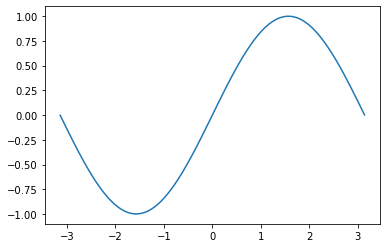

In [1]:
# inline plotting
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3.14, 3.14, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()

### PyTorch



![img](figures/pytorch.jpeg)

-   Deep learning framework based on Torch, a library for the Lua language
-   Library written in python, user-friendly interface
-   API is similar to numpy, can write straightforward python (cf. tensorflow)
-   Easy to get started building networks
    -   Though a little more setup required than Keras, with the trade-off
        that you understand the training process deeper
-   Quickly build and train serious models, easy to experiment

We're going to run through some examples step-by-step in colab, and
the complete examples in a single cell are available at the bottom of
the notebook.



### imports



-   Follow along either on the web-based service, or your own machine
-   Lets pull in all the imports and definitions we'll need up front



#### :BMCOL:



In [1]:
import matplotlib
# matplotlib.use("AGG")  # To batch graphics
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import datetime

## NN: Fisher's Irises



### Overarching Idea of (Supervised) Maching Learning



-   Framework for Machine Learning: given a set of data, and set of
    expected outputs (typically categories), build a system which learns
    how to connect data to output
-   Neural Network is one type, connect stacks of tensor operators with fixed linear and non-linear transformations
-   Optimize transformation parameters so as to approximate expected outputs



### The iris dataset and a basic network with Keras



#### :BMCOL:



| Iris Versicolor|Iris Virginica|Iris Setosa|
| [img src="figures/Blue_Flag,_Ottawa.jpg" alt="Blue_Flag,_Ottawa.jpg" /](img src="figures/Blue_Flag,_Ottawa.jpg" alt="Blue_Flag,_Ottawa.jpg" /)|[img src="figures/1920px-Iris_virginica_2.jpg" alt="1920px-Iris_virginica_2.jpg" /](img src="figures/1920px-Iris_virginica_2.jpg" alt="1920px-Iris_virginica_2.jpg" /)|[img src="figures/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Kosaciec_szczecinkowaty_Iris_setosa.jpg" /](img src="figures/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Kosaciec_szczecinkowaty_Iris_setosa.jpg" /)|

![img](figures/iris_petal_sepal.png)



#### :BMCOL:



-   Let's take a concrete example
-   The iris dataset is a classic classification task, first studied by
    Fisher in 1936.
-   The goal is, given features measured from a particular
    iris, classify it into one of three species
    -   Iris setosa, virginica, versicolor.
-   The variables are: Sepal width and length, petal width and length (all in cm).



### Iris dataset



We begin by loading the iris dataset, helpfully available from the
seaborn pacakge, which also lets us create plots showing the
correlations between the variables.



In [1]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

### Iris Variables



Lets view the basic variables we have. Setosa (blue) looks easily
separable by the petal length and width, but versicolor and virginica
are a little tricky.



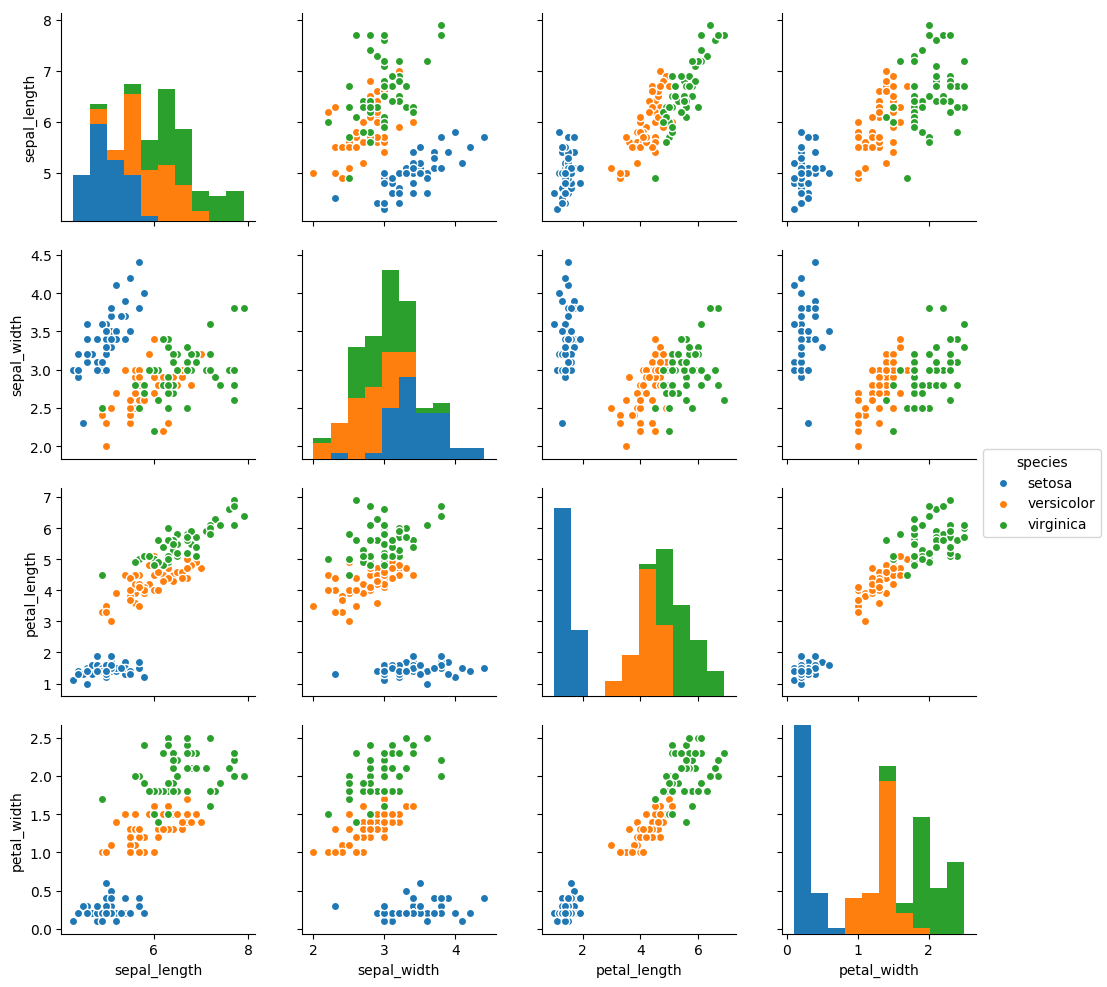

In [1]:
plot = sns.pairplot(iris, hue="species")
plot.savefig('iris.png')

### PyTorch Networks



In order to classify the irises, we'll build a simple network in PyTorch.

-   Helper functions to easily build neural networks are provided by the
    `torch.nn` module (usually imported as `nn`)
-   In PyTorch, neural networks are made as classes deriving from
    `nn.Module`
-   You need to provide an `__init__` method setting up the parameters
    (i.e. attach them to `self`), and a `forward(x)` method which
    returns the network output for the input `x`
    -   PyTorch keeps track of the parameters and the **computational
        graph** which is needed to efficiently perform backpropagation
-   Interface to/from the model with the PyTorch `Tensor` class
    (essentially a numpy array which can be interfaced with PyTorch's
    backprop and can be placed on the GPU)
    -   In fact, `Tensor.numpy()` will give you back a regular numpy array

![img](figures/nn-1a.png)



In [1]:
arr = np.array([1.,2.,3.])
print(torch.Tensor(arr)) # build from a numpy array
print(torch.Tensor([1.,2.,3.])) # or a python array
print(torch.linspace(1., 3., 3)) # or a helper function

tensor([1., 2., 3.])
tensor([1., 2., 3.])
tensor([1., 2., 3.])

### Model



-   Our model will be a simple NN with a single hidden layer
-   We start by building a `nn.Module` class and add `nn.Linear` (fully-connected) layer, with sigmoid activation
-   `nn.Module` : the base class for networks (really computational
    graphs) in pytorch, your networks should derive from this class, and
    call its `__init__` method
-   `nn.Linear`: standard layer, all inputs connect to all outputs: $\hat{y} = W\hat{x} + \hat{b}$
    -   `nn.Linear(input_dim, output_dim)`
-   In pytorch, activations are just functions in the `torch` module,
    they have equivalents in `torch.nn`, but one of the strengths of
    pytorch cf keras is that you can just call functions like standard
    numpy
-   Some commonly seen activation functions:
    -   `sigmoid`: $f(x) = \frac{1}{1 + e^{-x}}$
    -   `tanh`: $f(x) = \tanh{x} = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
    -   `relu`: $f(x) = \mathrm{max}(0, x)$, 'rectified linear unit'
    -   `softplus`: $f(x) =  \ln{(1 + e^x)}$, smooth approx. to `relu`
    -   `softmax`: $f_k(x) = \frac{e^{-x_k}}{\sum_i e^{-x_i}}$ for the $k$'th output, as last layer of categorical distribution, represents a probability distribution over the outputs



### Build a model: Python code



Putting it all together, we can build our first neural network:



In [1]:
class MyNet(nn.Module):
    def __init__(self):
        # setup with nn.Module's initializer
        super(MyNet, self).__init__()
        # Linear is a helper creating a fully-connected layer
        # (i.e. typical feedforward neural network)
        self.fc1 = nn.Linear(4,128) # fc=fully-connected
        self.fc2 = nn.Linear(128,3) # 3 possible outputs
    def forward(self, x):
        # Typical pattern in torch code, reuse the name x for
        # successive layers
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Build an instance of the model
net = MyNet()
net

MyNet(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

We can see how many parameters (trainable weights) the model has by
summing over the `numel()` from the `parameters()` list. It matches
our expectation:



In [1]:
sum(p.numel() for p in net.parameters()), 4*128+128 + 3*128+3

| 1027 | 1027 |

-   Simply use the regular torch functions available in
-   Notice, we didn't specify a softmax activation in the final layer
    -   We'll see why when we get to training
-   To use, simply pass in an input tensor



In [1]:
input = torch.tensor([1.,2.,3.,4.])
net(input)

tensor([ 0.1369, -0.3811, -0.6350], grad_fn=<AddBackward0>)

-   Note that the network allows you to pass in several datapoints at
    once, so you can use a tensor of dimension 1 more than the
    dimension of a single datapoint
-   Here, we have a 1d tensor with 4 elements in the first dimension, so
    we can pass a dimension 2 tensor in (the first dimension is the n-inputs dimension)



In [1]:
# Process two inputs, get back two outputs
input = torch.tensor([[1.,2.,3.,4.],
                      [2.,3.,4.,5.]])
net(input)

tensor([[-0.3247, -0.2006,  0.1621],
        [-0.3255, -0.1476,  0.1677]], grad_fn=<AddmmBackward>)

-   To run on the GPU, we need to make sure all the parameters of the
    network are placed on the GPU, and the inputs are placed on the GPU.
    -   We can use the `Tensor.cuda()` funcion which returns a GPU copy of the tensor
    -   We can also use `Tensor.to(dev)` with `dev =
            torch.device('cuda:0')` to specify a specific CUDA device, or have a
        way to switch to cpu (`dev = torch.device('cpu')`, could have an
        if-clause choosing cuda if available or else CPU)
-   Similarly, we can put a cuda tensor back on the CPU with `Tensor.cpu()`



In [1]:
net = net.cuda() # put network on GPU 
input = input.cuda() # and the input tensor
net(input) # you should see the device is now displayed

tensor([[-0.3247, -0.2006,  0.1621],
        [-0.3255, -0.1476,  0.1677]], device='cuda:0', grad_fn=<AddmmBackward>)

### Loss function



-   To train a network, we need a function to minimize, a *loss* function
-   There are many loss functions built-in to pytorch, some useful ones:
    -   `BCELoss` : binary cross-entropy loss, for classifying a single
        output for on-off/yes-no conditions, it returns -log(output) if
        the result should be 1, -log(1-output) if the result should be 0
        -   This derives from a likelihood anaylsis of the binomial distribution
    -   `CrossEntropyLoss` : cross-entropy loss, for classifying into
        multiple categories using a one-hot encoding scheme,   
        -log(softmax<sub>output</sub>[correct position])
    -   `MSELoss` : mean-square error loss, useful for regression and
        similar
-   They have the common form `loss_fn(prediction, true_values)`
    -   `prediction` is the network output for a batch, `true_values` are
        the corresponding truth labels

Lets start with an example of binary cross-entropy loss. Use when
there's only 2 classes to classify. Here, we also show a quicker way
of setting up a simple network using `Sequential` (should be familiar
if you know Keras).



In [1]:
# For simple networks just containing stacks of layers, one can use
# the Sequential module instead, need explicit layers for the
# activation in this case
aNet = nn.Sequential(nn.Linear(2,4), nn.Sigmoid(), nn.Linear(4,1), nn.Sigmoid()).cuda()

loss_fn = torch.nn.BCELoss() # the losses live in torch.nn
out = aNet(torch.zeros(2).cuda()) # the net is on the GPU
loss = loss_fn(out, torch.tensor([1.]).cuda()) # one datapt
print(loss.item(), -torch.log(out).item()) # theres no magic

1.0056694746017456 1.0056694746017456

For more than two outputs, we use cross-entropy loss. In pytorch, the
loss function applies the softmax itself (so we don't need it in our
network), and then applies the -log(p) function on the true values
output [think of it like the -log of the networks probability for it
to be the true value].



In [1]:
loss_fn = torch.nn.CrossEntropyLoss()
# the net is on the GPU, here we create 3 inputs, each filled with zeros
out = net(torch.zeros(3,4).cuda())
 # for CrossEntropyLoss, the true values should be the position of the real label
print(loss_fn(out, torch.tensor([0,1,2]).cuda()))
# Note that the output is the *average* of the losses of all the input items
#   this makes it easier to process a batch of inputs and run gradient descent

tensor(1.1201, device='cuda:0', grad_fn=<NllLossBackward>)

Just to be explicit of what CrossEntropyLoss means.

-   *softmax* normalizes the output layer so it sums to 1: $f_k(x) = \frac{e^{-y_k}}{\sum_i e^{-y_i}}$
-   Cross-entropy loss is the -log(p) where p is the output of the softmax for the (known) true value
    -   We are in the fully-labelled paradigm for training



In [1]:
out = net(torch.zeros(1,4).cuda())
loss = loss_fn(out, torch.tensor([0]).cuda())
# use item() to extract a single value from a tensor and return as a python float
print("output of the loss_fn", loss.item())
# we softmax over the outputs (zeroth axis is the datapoints axis, first axis is the output axis)
print(torch.softmax(out,1))
# The softmax output sums to 1, hence its like a "probability for each possible output"
print(torch.softmax(out,1).sum().item())
# then cross entropy is the -log(p) where p is the true output, here
# we pretend that we know the 0th category is the true category
print(-torch.log(torch.softmax(out,1)[0,0]).item())

output of the loss_fn 1.2442547082901
tensor([[0.2882, 0.2773, 0.4345]], device='cuda:0', grad_fn=<SoftmaxBackward>)
1.0
1.2442547082901

The closer the output of the true value is to 1, the closer the
CrossEntropyLoss is to 0. The closer it is to 0, the CrossEntropyLoss
will exponentially approach -infinity. Hence, minimizing the
CrossEntropyLoss is equivalent to maximizing the softmax output
probability of the true value to 1, and true value softmax outputs
close to 0 are exponentially penalized (its worse to be close to 0
than it is to be a little bit further from 1).

If you want to apply the softmax inside the network yourself, you can
use `NLLLoss` instead of `CrossEntropyLoss`. The reason you wouldn't
is that to get a "prediction" from an unknown datapoint after training
the network, you can just take the position with the max of the
network output, you don't need to calculate the (relatively expensive)
softmax, which is just rescaling the values so they're all between 0
and 1.

`BCELoss` expects a value between 0 and 1, so you should apply
`sigmoid` to the final layer in this case.



### Calculating Gradients



One final thing that we need to do is to calculate the partial
derivatives of all the parameters of the model with respect to the
loss, then we can use the gradient descent algorithm to update the
weights. PyTorch has been keeping track of the computational graph
built up when we calculate the loss, and can calculate and store the
partial derivatives in the graph by calling `backward()` on the loss.

Gradients accumulate, meaning multiple calls to `backward()` will sum
the gradients stored in each weight. This allows the graph to be built
up in possibly several batches before using, allowing for arbitrary
flexibility. We can clear out the gradients using `zero_grad()`:



In [1]:
loss.backward() # calculate once so the gradients are actually made
net.zero_grad() # clear the gradients
# print out one specific weight in our network
print(list(net.fc1.parameters())[0].grad[0,0])
out = net(torch.ones(1,4).cuda())
loss = loss_fn(out, torch.tensor([0]).cuda())
loss.backward() # calculate the gradients with inputs all 1s
print(list(net.fc1.parameters())[0].grad[0,0])

tensor(0., device='cuda:0')
tensor(-0.0056, device='cuda:0')

### Training



-   Now we fit to the training data.
-   We need to choose the number of `epochs` and the `batch_size`
    -   Epochs: number of training passes through the complete dataset
    -   Batch size: number of datapoints to consider together when
        updating the network, pytorch will calculate a single batch in a
        single call to the netowrk
-   We will pass through the input data as a tensor of shape (nsamples, 4)
-   We pass the output as a tensor of (nsamples) indicating the true class position
-   We transform the raw species information (which labels classes as
    strings: "setosa", "virginica", "versicolor") to the expected format
    -   Plants which are really setosa = 0, versicolor = 1, virginica = 2



In [1]:
variables = iris.values[:, :4]
species_ = iris.values[:, 4]

# One hot encode the species target
smap = {'setosa' : 0, 'versicolor' : 1, 'virginica' : 2}
species = np.array(list(smap[s] for s in species_))

# To show we are simply passing numpy arrays of the data
print(iris.iloc[0])
print("----------")
print(variables[0], ":", species_[0], ":", species[0])

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object
----------
[5.1 3.5 1.4 0.2] : setosa : 0

### Training Loop



-   By default, there's no automatic training functions in PyTorch, you're expected to build it yourself
    -   This is different from, say, Keras, which gives you a 'fit' function
-   It does give you the tools to build the loop easily though
-   We will fit the model to a labelled dataset by creating a "training
    loop"
-   We will pass a minibatch into the network, calculate the average
    loss, the update the network based on minimizing that minibatch loss
    -   This is "Stochastic Gradient Descent", as opposed to full gradient
        descent, which would calculate the average on the full dataset
        before updating the network
    -   The trade off is that SGD only approximates the loss landscape for
        each batch, while full GD requires much more computation for each update
    -   Also, you can argue that SGD should generalize better since its
        harder to fit to the datapoints and easier to fit general features 
        with the loss landscape constantly changing between updates
-   An optimizer keeps track of the gradients and can potentially
    automatically set different learning rates for different parameters
    -   E.g. look up Adam, Adagrad, or RMSprop for instance
    -   We'll use the basic SGD optimizer here
-   The `torch.optim` module contains several optimizers, which take in
    the network parameters and some options, and will keep track of the
    gradients, and apply a gradient descent (or similar) `step` to the
    network
    -   We use `zero_grad` to zero out the gradients: you can also run
        several batches and then step the optimizer
-   `n_epochs` is the number of times through the complete dataset you will train for
    -   The more you train, the better the fit, but you need to be careful of overfitting



In [1]:
# By default, pytorch operates on floats, not doubles
X, Y = torch.tensor(variables.astype('float32')).cuda(), torch.tensor(species).cuda()
# A basic stochastic gradient descent optimizer
n_epochs, minibatch_size = 5, 16
optimizer = optim.SGD(net.parameters(), lr=0.1)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer.zero_grad()
# loop over epochs
for _ in range(n_epochs):
  # take slices of data for the minibatch
  for idx in range(0,len(X),minibatch_size):
    x, y = X[idx:idx+minibatch_size], Y[idx:idx+minibatch_size]
    optimizer.zero_grad()
    prediction = net(x)
    loss = loss_fn(prediction, y)
    loss.backward()
    optimizer.step()
print("Finished training!")

Finished training!

Now lets check the output of the trained network on some example
inputs.



In [1]:
for x, y in zip(torch.softmax(net(X[:5]),1), Y[:5]): print(x,y.item())

tensor([0.7734, 0.1449, 0.0817], device='cuda:0', grad_fn=<SelectBackward>) 0
tensor([0.7146, 0.1688, 0.1166], device='cuda:0', grad_fn=<SelectBackward>) 0
tensor([0.7630, 0.1485, 0.0885], device='cuda:0', grad_fn=<SelectBackward>) 0
tensor([0.7079, 0.1656, 0.1265], device='cuda:0', grad_fn=<SelectBackward>) 0
tensor([0.7853, 0.1385, 0.0763], device='cuda:0', grad_fn=<SelectBackward>) 0

Looking good. Lets check the accuracy of the network



In [1]:
prediction=net(X)
_, prediction_y = torch.max(prediction,1) # returns (the max value, position of the max value)
print(torch.sum(prediction_y==Y) / float(len(Y))) # sum the number we got correct

tensor(0.6667, device='cuda:0')

67%, the network got stuck in a local minimum this time (you'll
probably get a different value).

Lets make a confusion matrix to find out where the network is having troubles



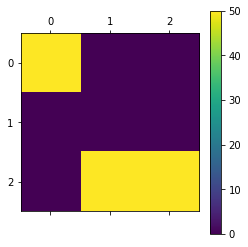

In [1]:
confusion = torch.zeros(3, 3)
for i, j in zip(net(X).max(1)[1], Y): confusion[i,j] += 1
plt.matshow(confusion)
plt.colorbar()

So its confusing 1 for 2. We could try training more, or if the
network is simply stuck in a local minima, try to retrain, possibly
changing some of the values.

Some exercises

-   Try to increase the number of nodes in the hidden layer of the
    network, and retraining
-   Try adding another hidden layer to the network and retraining
    -   You'll need to add an `fc3` and you change the `fc2` output to
        more hidden nodes
-   The activation function we're using `sigmoid` is prone to getting
    stuck (if all inputs are large or small, then it will output 0 or 1
    always, and the partial will always be 0, so its impossible to
    train). Try using an alternative activation function, like `relu`,
    does it work better?
-   Try changing the optimizer. For example, try using `Adam`, does it
    help the network converge more quickly?
    -   In this case though, there are very few datapoints&#x2026;



## DNN: MNIST



-   Okay, we're done with the warmup, lets try to build an actual deep
    learning network, by training an image classifier
-   Another, more recent, classic classification task
-   Given a 28x28 image of a handwritten digit, can you train a
    classifier to recognize the numbers from 0 to 9?
    -   The data was collected by NIST, and Modified to fit into a
        standard format: 28x28 with 256 greyscale levels per pixel
-   There is an additional library `torchvision` which has the ability
    to download the dataset into a torch dataset, which is a class that
    wraps up the X and Y tensors we were using
    -   It gives us PIL images, we use the transform to change it to a
        tensor
    -   There are other transformations you could perform on the image:
        cropping, normalizing, etc.
-   The dataset is split into testing and training sets
    -   The training set should be used to train the network, the testing
        set should only be used to test the network performance
    -   This helps gauge how well the training is doing to generalize on
        unseen data



In [1]:
train_ = torchvision.datasets.MNIST('/tmp', download=True, train=True, transform=torchvision.transforms.ToTensor())
test_ = torchvision.datasets.MNIST('/tmp', download=True, train=False, transform=torchvision.transforms.ToTensor())

Lets see what it looks like:



In [1]:
print(train_.data.shape) # X
print(train_.targets.shape) # Y
print(train_.data[0], train_.targets[0])

#+begin_example
torch.Size([60000, 28, 28])
torch.Size([60000])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0

So, the data is a 60000x28x28 tensor, containing integer values from 0
to 255, and the output is a 60000 element tensor encoding the true
label in exactly the format needed for CrossEntropyLoss (and
corresponding to the real digit value). Lets view some images:



tensor([5, 0, 4, 1, 9, 2, 1, 3])

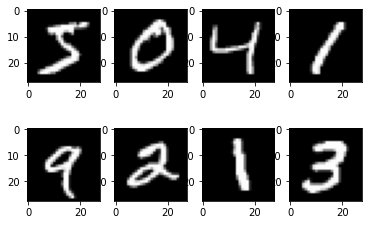

In [1]:
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(train_.data[i], cmap='gray')
print(train_.targets[:8])

We can use another facility of pytorch to create a `DataLoader`, which
wraps up our minibatching code from the previous section.



In [1]:
train = torch.utils.data.DataLoader(train_, batch_size=64)
test = torch.utils.data.DataLoader(test_, batch_size=64)

It makes it easier to do the training loop.



In [1]:
for x, y in train:
    print(x.shape, y.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])

### Convolutional Filter in PyTorch



Notice that x is actually given as a 4D tensor. The axis of length 1
is for image **channels**. If we had a color image, it would have length
3, after we pass it through a convolutional layer, it has # channels
== # filters in the layer.

Convolutional filters in pytorch are accessed with
`nn.Conv2d(nchannels_in, nchannels_out, filter_size)`.  Filter size
can be a scalar, in which case the filter is square, or you can pass a
2-tuple to specify the width and height.



In [1]:
conv = nn.Conv2d(1, 5, 7)
conv(x).shape

torch.Size([64, 5, 22, 22])

No filter padding, so it has reduced the image size. The `padding`
optional argument can be used to pad the image.



### A Convolutional Network



Lets make a network. It consists of a few layers of convolutions of
varying sizes, then, we will turn the filter image into a 1d array,
and process it through a fully-connected hidden layer. We use relu
instead of sigmoid here. relu(x) = 0 for negative x and relu(x) = x
for postive x, it tends to be better for network, since it is harder
to saturate, and shut a node down.



In [1]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.c1 = nn.Conv2d(1, 5, 7) # 28x28 -> 22x22
        self.c2 = nn.Conv2d(5, 10, 5) # 22x22 -> 18x18
        self.c3 = nn.Conv2d(10, 5, 3) # 18x18 -> 16x16
        self.fc1 = nn.Linear(16*16*5,100) # 5 channels of 16x16 images
        self.fc2 = nn.Linear(100,10)
    def forward(self, x):
        x = torch.relu(self.c1(x))
        x = torch.relu(self.c2(x))
        x = torch.relu(self.c3(x))
        # convert the 5x16x16 image into a 1d array with 5*16*16
        # elements, i.e. "flatten" it
        x = x.reshape(x.shape[0],-1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = ConvNet()
net(x).shape

torch.Size([64, 10])

### A More Complete Training Loop



-   Since we have a testing sample this time, lets instrument our training loop a little
-   We keep track of the running average of the loss / datapoint, and
    after 300 minibatches we print out the running average loss, as well
    as the average loss over the testing dataset
-   We can check for overtraining (the test set will start to diverge
    from the training set)
    -   Here, its a bit bumpy to tell, but you can see the training loss
        gets lower than the testing, indicating a possible saturation
        point for this model
-   We also only put the data on the GPU as needed
    -   GPU memory is a limited resource, we need to keep the network
        parameters and the data, so can't put the whole dataset on the GPU
        this time (unless google gives you an A100 or something&#x2026;)



In [1]:
d = torch.device('cuda')
net = ConvNet()
net.to(d)

optim = torch.optim.Adam(net.parameters(), lr=0.002)
lossf = torch.nn.CrossEntropyLoss()
for epoch in range(5):
  tl,tn = 0.,0.
  for ii, (i, o) in enumerate(train):
    i,o = i.to(d), o.to(d)
    optim.zero_grad()
    loss = lossf(net(i), o)
    loss.backward()
    optim.step()
    tl+=loss.item()*i.size(0)
    tn+=i.size(0)
    if ii % 300 == 0:
      print(f"epoch {epoch} batch {ii:03d}", end=' ')
      print(f"train: {tl/tn:5f}", end=' ')
      tl,tn = 0.,0.
      for i, o in test:
        i,o = i.to(d), o.to(d)
        loss = lossf(net(i), o)
        tl+=loss.item()*i.size(0)
        tn+=i.size(0)
      print(f"test: {tl/tn:5f}")
      tl,tn = 0.,0.

#+begin_example
epoch 0 batch 000 train: 2.305417 test: 2.302866
epoch 0 batch 300 train: 0.432548 test: 0.157276
epoch 0 batch 600 train: 0.159395 test: 0.151761
epoch 0 batch 900 train: 0.121112 test: 0.081811
epoch 1 batch 000 train: 0.043302 test: 0.092392
epoch 1 batch 300 train: 0.088562 test: 0.067064
epoch 1 batch 600 train: 0.070742 test: 0.082866
epoch 1 batch 900 train: 0.065900 test: 0.064576
epoch 2 batch 000 train: 0.018246 test: 0.077515
epoch 2 batch 300 train: 0.057674 test: 0.067060
epoch 2 batch 600 train: 0.049775 test: 0.074788
epoch 2 batch 900 train: 0.053226 test: 0.051444
epoch 3 batch 000 train: 0.013761 test: 0.058822
epoch 3 batch 300 train: 0.043579 test: 0.062349
epoch 3 batch 600 train: 0.040766 test: 0.056704
epoch 3 batch 900 train: 0.035504 test: 0.052557
epoch 4 batch 000 train: 0.041700 test: 0.048617
epoch 4 batch 300 train: 0.038992 test: 0.074224
epoch 4 batch 600 train: 0.033564 test: 0.068567
epoch 4 batch 900 train: 0.031579 test: 0.051940
#+en

The model starts with a loss of -2.3, and saturates at about 0.05,
this means that the model is, on average, giving the correct item a
probability of 0.10 (10 categories, so this is equivalent to
completely random) at the beginning, and giving the correct item an
output of 0.95 at the end of training.



In [1]:
np.exp(-2.3), np.exp(-0.05)

| 0.10025884372280375 | 0.951229424500714 |

Lets check the accuracy on the test set. In this case, we won't be
able to compute all the predictions in one pass (we would need to fit
the whole test set on the GPU!).



In [1]:
correct, tot = 0, 0
for x, y in test:
    x, y = x.to(d), y.to(d)
    prediction = net(x)
    _, prediction_y = torch.max(prediction,1) # returns (the max value, position of the max value)
    correct += torch.sum(prediction_y==y)
    tot += len(y)
print(f"Acc.: {correct/float(tot):.3f}")

Acc.: 0.983

Exercises:

-   Compare the speed of the network on and off the GPU
    -   Convolutional layers are the reason we need beefy GPUs for deep learning!
-   Modify the training loop to keep track of the average losses. Plot
    loss vs epoch for testing and training, do they keep up with each
    other?
-   Draw the confusion matrix for the testing set, like we did for the
    irises. Are there particular combinations its misclassifying?
-   Find examples the network is misclassifying and see what they look
    like. Do you think you would have classified them correctly?
-   Try adding more layers to the network, whats the best accuracy you can get?
-   With too deep a network you'll find it hard to stop from
    overtraining, try adding some regularization layers, such as
    dropout, illustrated below, or `nn.BatchNorm2d`
    -   Dropout helps by only allowing part of the network to see the
        datapoint each training, so effectively you're training an
        ensemble of networks
    -   BatchNorm smooths out the distribution of the values passed
        between layers as all the nodes update their weights, its
        generally always used these days (or something similar) due to how
        much it speeds up training large networks
    -   With these layers you need to put the network into training or
        evaluation mode. Use `net.train()`, and `net.eval()` respectively
-   Torchvision also comes with classic deep learning networks, like VGG
    and ResNet. Search the documentation and setup one of these networks
    to solve the MNIST classification problem. You might need to change
    the final layer of the network in order to do this.
-   Similarly, it comes with a variety of classic datasets. Try building
    a network to classify, for example, CIFAR10 (small color images in
    the categories: airplane, automobile, bird, cat, deer, dog, frog,
    horse, ship, truck)



In [1]:
drop = nn.Dropout(0.5)
print(torch.ones(5))
print(drop(torch.ones(5)))

tensor([1., 1., 1., 1., 1.])
tensor([0., 2., 0., 2., 2.])

Note that the dropout compensates for the nodes it sets to zero by
increasing the value of the remaining non-zero nodes, so the
downstream node will see values of the same order of magnitude with or
without the dropout.



## GAN



The discriminator network can just be our network from before, with a
single output: is the image real or fake?



In [1]:
train = torch.utils.data.DataLoader(train_, batch_size=32)

In [1]:
class Discr(nn.Module):
    def __init__(self):
        super(Discr, self).__init__()
        self.c1 = nn.Conv2d(1, 16, 7) # 28x28 -> 22x22
        self.c2 = nn.Conv2d(16, 64, 5) # 22x22 -> 18x18
        self.c3 = nn.Conv2d(64, 8, 3) # 18x18 -> 16x16
        self.fc1 = nn.Linear(16*16*8,100) # 8 channels of 16x16 images
        self.fc2 = nn.Linear(100,1)
        self.drop = nn.Dropout(0.5)
    def forward(self, x):
        x = torch.relu(self.drop(self.c1(x)))
        x = torch.relu(self.drop(self.c2(x)))
        x = torch.relu(self.drop(self.c3(x)))
        # convert the 5x16x16 image into a 1d array with 5*16*16
        # elements, i.e. "flatten" it
        x = x.reshape(x.shape[0],-1)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

dis = Discr().cuda()
print(dis(torch.randn(1,1,28,28).cuda()).shape)

torch.Size([1, 1])

### Generator



Here is the more interesting part. We want to take random noise, and
then output an image. We need to basically do the inverse of
convolving, that is, we take a image and pass it to the next layer
**adding** features based on the input, rather than searching for
them. We can use a `ConvTranspose2d` layer to do this



In [1]:
class Gen(nn.Module):
  def __init__(self, input_size=100):
    super(Gen, self).__init__()
    self.input_size = input_size
    self.fc1 = nn.Linear(self.input_size, 16*16*8)
    self.cc1 = nn.ConvTranspose2d(8,64,3) # 64x18x18
    self.bn1 = nn.BatchNorm2d(64)
    self.cc2 = nn.ConvTranspose2d(64,16,5) # 16x22x22
    self.bn2 = nn.BatchNorm2d(16)
    self.cc3 = nn.ConvTranspose2d(16,1,7) # 1x28x28
  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = x.view(-1,8,16,16)
    x = torch.relu(self.bn1(self.cc1(x)))
    x = torch.relu(self.bn2(self.cc2(x)))
    x = torch.sigmoid(self.cc3(x))
    return x

gen = Gen().cuda()
dis(gen(torch.randn(10,100).cuda())).shape

torch.Size([10, 1])

### Training Loop



Notice we put dropout in the discriminator (its better to have a
smaller capacity discriminator, since it tends to be easier to train
the discriminator than the generator), and BatchNorm in the
generator. We want to speed up the generator training and control the
discriminator training. GANs are delicate!

We need to train both the discriminator and the generator. We set up
separate optimizers for each.

Our training loop starts by outputting sample images the generator is
currently creating. We use the same latent vectors each time, so we
can see the evolution of the same vector.

In the loop, we update the discriminator by converging the output
toward 1 for real images, and toward 0 for generated images.

We then update the generator, by passing the generated images through
the discriminator, and trying to send the value of the discriminator
toward 1 (by changing the **generator** weights, the discriminator
weights are fixed during this update).

We use `requires_grad` to turn on/off the caching of values, which can
speed up the training (we should/could have done this in the training
phase of the previous classification task also).

We keep track of the average loss for the discriminator and generator
updates separately and record them at the end of each epoch. This is
particularly important here as GANs are prone to collapse: one of the
generator or discriminator becomes too good, and the other no longer
trains. This is usually seen by one of the losses going to 0, and the
other diverging. A good training run should have the generator and
discriminator fighting with each other, and small fluctuations in each
loss.  Another thing to look out for is **mode collapse**: this is where
the generator only outputs a single image, effectively ignoring the
random noise input. If all the images being produced in our test step
are the same, we probably have mode collapse.



In [1]:
g_optim = torch.optim.Adam(gen.parameters(), lr=2e-4)
d_optim = torch.optim.Adam(dis.parameters(), lr=2e-4)
lossf = nn.BCELoss()

gen.train(); dis.train()
# keep the input latent vectors for images the same in each epoch
noise = torch.randn((25,gen.input_size)).cuda()
gloss, dloss = [], []
for epoch in range(25):
  print(f"--- Epoch {epoch} {datetime.datetime.now().strftime('%H:%M:%S')}")
  gen.eval()
  im = gen(noise).view(-1,28,28)
  plt.clf()
  plt.gcf().set_size_inches(25, 25)
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(im[i].detach().cpu(), cmap='gray')
  plt.savefig(f'images/fc_{epoch:03d}.png')
  plt.clf()
  gen.train()
  gl, gn = 0., 0.
  dl, dn = 0., 0.
  for ii, (i, o) in enumerate(train):
    i, o = i.cuda(), o.cuda()
    ones = torch.tensor([1.]*i.size(0)).view(-1,1).cuda()
    zeros = torch.tensor([0.]*i.size(0)).view(-1,1).cuda()
    randn = lambda: torch.randn(i.size(0), gen.input_size).cuda()
    # update dis, try to distinguish real (from the MNIST dataset)
    # from fake (from gen) images
    d_optim.zero_grad()
    gen.requires_grad=False
    dis.requires_grad=True
    loss = lossf(dis(i), ones)
    loss.backward()
    dl += loss; dn += i.size(0)
    loss = lossf(dis(gen(randn())), zeros)
    loss.backward()
    dl += loss; dn += i.size(0)
    d_optim.step()
    
    # update gen, try to fool the dis network by driving its output on
    # fake images toward 1 (by only changing the gen network)
    g_optim.zero_grad()
    dis.requires_grad=False
    gen.requires_grad=True
    loss = lossf(dis(gen(randn())), ones)
    loss.backward()
    gl += loss; gn += i.size(0)
    loss = lossf(dis(gen(randn())), ones)
    loss.backward()
    gl += loss; gn += i.size(0)
    g_optim.step()
    
  print(f"dis: {(dl/dn).item():.3f} gen: {(gl/gn).item():.3f}")
  gloss.append((gl/gn).item())
  dloss.append((dl/dn).item())

print("Done")

#+begin_example
--- Epoch 0 20:22:27
dis: 0.012 gen: 0.064
--- Epoch 1 20:22:52
dis: 0.015 gen: 0.045
--- Epoch 2 20:23:17
dis: 0.015 gen: 0.042
--- Epoch 3 20:23:42
dis: 0.015 gen: 0.042
--- Epoch 4 20:24:07
dis: 0.015 gen: 0.044
--- Epoch 5 20:24:32
dis: 0.014 gen: 0.046
--- Epoch 6 20:24:58
dis: 0.014 gen: 0.047
--- Epoch 7 20:25:23
dis: 0.014 gen: 0.049
--- Epoch 8 20:25:48
dis: 0.014 gen: 0.050
--- Epoch 9 20:26:14
dis: 0.013 gen: 0.052
--- Epoch 10 20:26:38
dis: 0.013 gen: 0.052
--- Epoch 11 20:27:03
dis: 0.013 gen: 0.053
--- Epoch 12 20:27:29
dis: 0.013 gen: 0.053
--- Epoch 13 20:27:54
dis: 0.013 gen: 0.053
--- Epoch 14 20:28:19
dis: 0.013 gen: 0.053
--- Epoch 15 20:28:44
dis: 0.013 gen: 0.052
--- Epoch 16 20:29:09
dis: 0.013 gen: 0.052
--- Epoch 17 20:29:34
dis: 0.013 gen: 0.051
--- Epoch 18 20:29:59
dis: 0.013 gen: 0.051
--- Epoch 19 20:30:25
dis: 0.014 gen: 0.050
--- Epoch 20 20:30:50
dis: 0.014 gen: 0.050
--- Epoch 21 20:31:15
dis: 0.014 gen: 0.049
--- Epoch 22 20:31:39
dis:

Images we save can be displayed in colab with code like this:



In [1]:
from IPython.display import Image
Image(filename='images/fc_004.png')

Example images over epochs:

Epoch 0:
![img](images/fc_000.png)
Epoch 1:
![img](images/fc_001.png)
Epoch 2:
![img](images/fc_002.png)
Epoch 3:
![img](images/fc_003.png)
Epoch 5:
![img](images/fc_005.png)
Epoch 10:
![img](images/fc_010.png)
Epoch 24:
![img](images/fc_024.png)

Exercises:

-   The training loop is sparsely instrumented in this case, so it can
    take a while to see whats going on. This can be a problem if the
    training collapses (i.e. it will waste lots of time). Try moving the
    loss output inside the batch loop, and output every few hundred
    batches
-   In this case, using batchnorm on the generator will greatly
    regularize and speed up the training.  What happens if you remove
    the normalization? [when I tried, I saw mode collapse]
-   Try adding more or fewer layers, how does it affect the speed and
    quality of generation?



## Complete Examples



### Iris Classification with a Simple NN



tensor(0.6667)

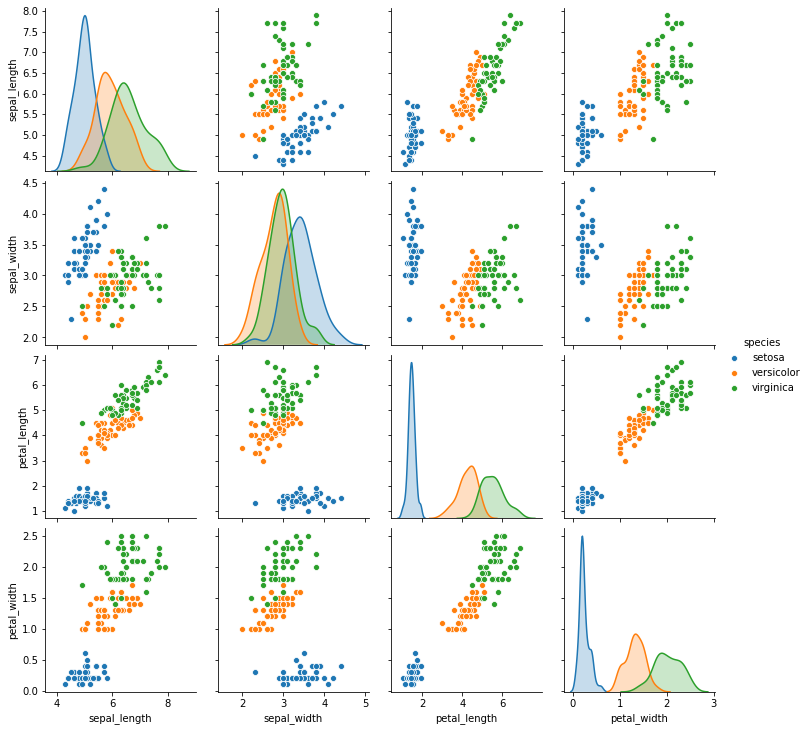

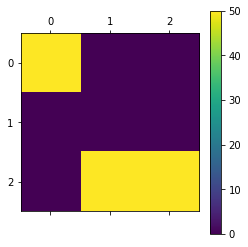

In [1]:
import seaborn as sns
import torch as th
import torch.nn as nn
import torch.optim as optim

iris = sns.load_dataset("iris")

plot = sns.pairplot(iris, hue="species")
plot.savefig('iris.png')

# A simple feedforward network in pytorch
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(4,128) # fc=fully-connected
        self.fc2 = nn.Linear(128,3) # 3 possible outputs
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

net = MyNet()
variables = iris.values[:, :4]
species_ = iris.values[:, 4]

smap = {'setosa' : 0, 'versicolor' : 1, 'virginica' : 2}
species = np.array(list(smap[s] for s in species_))
X, Y = torch.tensor(variables.astype('float32')), torch.tensor(species)

# A basic (uninstrumented) pytorch training loop
n_epochs, minibatch_size = 15, 16
optimizer = optim.SGD(net.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer.zero_grad()
for _ in range(n_epochs):
  for idx in range(0, len(X), minibatch_size):
    optimizer.zero_grad()
    prediction = net(X[idx:idx+minibatch_size])
    loss = loss_fn(prediction, Y[idx:idx+minibatch_size])
    loss.backward()
    optimizer.step()

prediction=net(X)
_, prediction_y = torch.max(prediction,1) # returns (the max value, position of the max value)
print(torch.sum(prediction_y==Y) / float(len(Y))) # sum the number we got correct

confusion = torch.zeros(3, 3)
for i, j in zip(net(X).max(1)[1], Y): confusion[i,j] += 1
plt.matshow(confusion)
plt.colorbar()

### MNIST Classification with a CNN



Make sure you turn on the GPU in colab!



In [1]:
import torch as th
import torch.nn as nn
import torch.optim as optim
import torchvision

train_ = torchvision.datasets.MNIST('/tmp', download=True, train=True, transform=torchvision.transforms.ToTensor())
test_ = torchvision.datasets.MNIST('/tmp', download=True, train=False, transform=torchvision.transforms.ToTensor())
train = torch.utils.data.DataLoader(train_, batch_size=64)
test = torch.utils.data.DataLoader(test_, batch_size=64)

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.c1 = nn.Conv2d(1, 5, 7) # 28x28 -> 22x22
        self.c2 = nn.Conv2d(5, 10, 5) # 22x22 -> 18x18
        self.c3 = nn.Conv2d(10, 5, 3) # 18x18 -> 16x16
        self.fc1 = nn.Linear(16*16*5,100) # 5 channels of 16x16 images
        self.fc2 = nn.Linear(100,10)
    def forward(self, x):
        x = torch.relu(self.c1(x))
        x = torch.relu(self.c2(x))
        x = torch.relu(self.c3(x))
        # convert the 5x16x16 image into a 1d array with 5*16*16
        # elements, i.e. "flatten" it
        x = x.reshape(x.shape[0],-1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

d = torch.device('cuda')
net = ConvNet()
net.to(d)

# slightly more featureful training loop
optim = torch.optim.Adam(net.parameters(), lr=0.002)
lossf = torch.nn.CrossEntropyLoss()
for epoch in range(5):
  tl,tn = 0.,0.
  for ii, (i, o) in enumerate(train):
    optim.zero_grad()
    loss = lossf(net(i.to(d)), o.to(d))
    loss.backward()
    optim.step()
    tl += loss.item()*i.size(0) # loss returns the *avg.* loss
    tn += i.size(0)
    if ii % 300 == 0:
      print(f"epoch {epoch} batch {ii:03d}", end=' ')
      print(f"train: {tl/tn:5f}", end=' ')
      tl,tn = 0.,0.
      for i, o in test:
        loss = lossf(net(i.to(d)), o.to(d))
        tl += loss.item()*i.size(0)
        tn += i.size(0)
      print(f"test: {tl/tn:5f}")
      tl,tn = 0.,0.

correct, tot = 0, 0
for x, y in test:
    x, y = x.to(d), y.to(d)
    prediction = net(x)
    _, prediction_y = torch.max(prediction,1) # returns (the max value, position of the max value)
    correct += torch.sum(prediction_y==y)
    tot += len(y)
print(f"Acc.: {correct/float(tot):.3f}")

### MNIST GAN



In [1]:
import matplotlib.pyplot as plt
import torch as th
import torch.nn as nn
import torch.optim as optim
import torchvision
import datetime
import os

train_ = torchvision.datasets.MNIST('/tmp', download=True, train=True, transform=torchvision.transforms.ToTensor())
train = torch.utils.data.DataLoader(train_, batch_size=64)

class Discr(nn.Module):
    def __init__(self):
        super(Discr, self).__init__()
        self.c1 = nn.Conv2d(1, 16, 7) # 28x28 -> 22x22
        self.c2 = nn.Conv2d(16, 64, 5) # 22x22 -> 18x18
        self.c3 = nn.Conv2d(64, 8, 3) # 18x18 -> 16x16
        self.fc1 = nn.Linear(16*16*8,100) # 8 channels of 16x16 images
        self.fc2 = nn.Linear(100,1)
        self.drop = nn.Dropout(0.5)
    def forward(self, x):
        x = torch.relu(self.drop(self.c1(x)))
        x = torch.relu(self.drop(self.c2(x)))
        x = torch.relu(self.drop(self.c3(x)))
        # convert the 5x16x16 image into a 1d array with 5*16*16
        # elements, i.e. "flatten" it
        x = x.reshape(x.shape[0],-1)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

class Gen(nn.Module):
  def __init__(self, input_size=100):
    super(Gen, self).__init__()
    self.input_size = input_size
    self.fc1 = nn.Linear(self.input_size, 16*16*8)
    self.cc1 = nn.ConvTranspose2d(8,64,3) # 64x18x18
    self.bn1 = nn.BatchNorm2d(64)
    self.cc2 = nn.ConvTranspose2d(64,16,5) # 16x22x22
    self.bn2 = nn.BatchNorm2d(16)
    self.cc3 = nn.ConvTranspose2d(16,1,7) # 1x28x28
  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = x.view(-1,8,16,16)
    x = torch.relu(self.bn1(self.cc1(x)))
    x = torch.relu(self.bn2(self.cc2(x)))
    x = torch.sigmoid(self.cc3(x))
    return x

gen = Gen().cuda()
dis = Discr().cuda()


g_optim = torch.optim.Adam(gen.parameters(), lr=2e-4)
d_optim = torch.optim.Adam(dis.parameters(), lr=2e-4)
lossf = nn.BCELoss()

gen.train(); dis.train()
# keep the input latent vectors for images the same in each epoch
noise = torch.randn((25,gen.input_size)).cuda()
gloss, dloss = [], []
for epoch in range(25):
  print(f"--- Epoch {epoch} {datetime.datetime.now().strftime('%H:%M:%S')}")
  gen.eval()
  im = gen(noise).view(-1,28,28)
  plt.clf()
  plt.gcf().set_size_inches(25, 25)
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(im[i].detach().cpu(), cmap='gray')
  os.system('mkdir -p images')
  plt.savefig(f'images/fc_{epoch:03d}.png')
  plt.clf()
  gen.train()
  gl, gn = 0., 0.
  dl, dn = 0., 0.
  for ii, (i, o) in enumerate(train):
    i, o = i.cuda(), o.cuda()
    ones = torch.tensor([1.]*i.size(0)).view(-1,1).cuda()
    zeros = torch.tensor([0.]*i.size(0)).view(-1,1).cuda()
    randn = lambda: torch.randn(i.size(0), gen.input_size).cuda()
    # update dis
    d_optim.zero_grad()
    gen.requires_grad=False
    dis.requires_grad=True
    loss = lossf(dis(i), ones)
    loss.backward()
    dl += loss; dn += i.size(0)
    loss = lossf(dis(gen(randn())), zeros)
    loss.backward()
    dl += loss; dn += i.size(0)
    d_optim.step()
    
    # update gen
    g_optim.zero_grad()
    dis.requires_grad=False
    gen.requires_grad=True
    loss = lossf(dis(gen(randn())), ones)
    loss.backward()
    gl += loss; gn += i.size(0)
    loss = lossf(dis(gen(randn())), ones)
    loss.backward()
    gl += loss; gn += i.size(0)
    g_optim.step()
    
  print(f"dis: {(dl/dn).item():.3f} gen: {(gl/gn).item():.3f}")
  gloss.append((gl/gn).item())
  dloss.append((dl/dn).item())

print("Done")

#+begin_example
--- Epoch 0 13:39:10
dis: 0.006 gen: 0.034
--- Epoch 1 13:39:25
dis: 0.007 gen: 0.026
--- Epoch 2 13:39:41
dis: 0.007 gen: 0.023
--- Epoch 3 13:39:57
dis: 0.008 gen: 0.021
--- Epoch 4 13:40:13
dis: 0.008 gen: 0.022
--- Epoch 5 13:40:29
dis: 0.008 gen: 0.022
--- Epoch 6 13:40:45
dis: 0.007 gen: 0.023
--- Epoch 7 13:41:01
dis: 0.007 gen: 0.023
--- Epoch 8 13:41:16
dis: 0.007 gen: 0.023
--- Epoch 9 13:41:32
dis: 0.007 gen: 0.023
--- Epoch 10 13:41:48
dis: 0.007 gen: 0.023
--- Epoch 11 13:42:03
dis: 0.007 gen: 0.023
--- Epoch 12 13:42:19
dis: 0.007 gen: 0.023
--- Epoch 13 13:42:35
dis: 0.007 gen: 0.024
--- Epoch 14 13:42:51
dis: 0.007 gen: 0.024
--- Epoch 15 13:43:06
dis: 0.007 gen: 0.024
--- Epoch 16 13:43:22
dis: 0.007 gen: 0.025
--- Epoch 17 13:43:37
dis: 0.007 gen: 0.025
--- Epoch 18 13:43:53
dis: 0.007 gen: 0.026
--- Epoch 19 13:44:09
dis: 0.007 gen: 0.026
--- Epoch 20 13:44:26
dis: 0.006 gen: 0.027
--- Epoch 21 13:44:41
dis: 0.006 gen: 0.027
--- Epoch 22 13:44:57
dis: